# Packages

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from pprint import pprint
from prettytable import PrettyTable

In [2]:
# sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVC, NuSVC
from scipy.stats import mode
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
import lightgbm as lgb
from catboost import CatBoostClassifier

# Initialisation

In [ ]:
naive_sub= pd.read_csv('forest/naive_submission.csv')
df= pd.read_csv('forest/train.csv').drop('Unnamed: 0',axis=1)
test= pd.read_csv('forest/test.csv').drop('row_ID',axis=1)

# Préparation des données

In [4]:
print("Nombre d'observations dans les données d'entraînement:",len(df))
print("Nombre d'observations dans les données test:",len(test))

Nombre d'observations dans les données d'entraînement: 100000
Nombre d'observations dans les données test: 481012


## Variables

In [13]:
columns = list(df.columns)
print("Toutes les variables du jeu de données:")
print()
for i in range(0, len(columns), 5):
    print(", ".join(columns[i:i+5]))

Toutes les variables du jeu de données:

Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points
Wilderness_Area1, Wilderness_Area2, Wilderness_Area3, Wilderness_Area4, Soil_Type1
Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6
Soil_Type7, Soil_Type8, Soil_Type9, Soil_Type10, Soil_Type11
Soil_Type12, Soil_Type13, Soil_Type14, Soil_Type15, Soil_Type16
Soil_Type17, Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type21
Soil_Type22, Soil_Type23, Soil_Type24, Soil_Type25, Soil_Type26
Soil_Type27, Soil_Type28, Soil_Type29, Soil_Type30, Soil_Type31
Soil_Type32, Soil_Type33, Soil_Type34, Soil_Type35, Soil_Type36
Soil_Type37, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type


In [14]:
# Vérification de données manquantes
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## Analyse exploratoire

In [16]:
# Résumé des variables
df_summary = df.describe(include='all').T
df_summary

,count,mean,std,min,25%,50%,75%,max
Elevation,100000.0,2959.21515,280.832825,1860.0,2809.0,2996.0,3163.00,3858.0
Aspect,100000.0,155.55126,111.759698,0.0,59.0,127.0,260.00,360.0
Slope,100000.0,14.12285,7.507368,0.0,9.0,13.0,18.00,62.0
Horizontal_Distance_To_Hydrology,100000.0,269.60563,212.770595,0.0,108.0,218.0,384.00,1383.0
Vertical_Distance_To_Hydrology,100000.0,46.82159,58.689319,-161.0,7.0,30.0,69.00,598.0
Horizontal_Distance_To_Roadways,100000.0,2350.36113,1560.499103,0.0,1103.0,1992.0,3331.25,7078.0
Hillshade_9am,100000.0,212.10380,26.841126,0.0,198.0,218.0,231.00,254.0
Hillshade_Noon,100000.0,223.34867,19.756411,42.0,213.0,226.0,237.00,254.0
Hillshade_3pm,100000.0,142.58566,38.459542,0.0,119.0,143.0,169.00,254.0
Horizontal_Distance_To_Fire_Points,100000.0,1976.43653,1324.925172,0.0,1020.0,1704.0,2549.00,7126.0


In [17]:
# Variable qualitative ou quantitative
# Toutes les variables sont quantitatives, à part Soil_Type et Wilderness_Area

quantitative_vars = columns[:10]
qual_vars = columns[10:]
qualitative_vars = [item.rsplit('_')[1] for item in qual_vars if item != 'Cover_Type']

### Varible cible: Cover_Type

Cover_Type
2    48676
1    36410
3     6273
7     3568
6     2967
5     1635
4      471
Name: count, dtype: int64


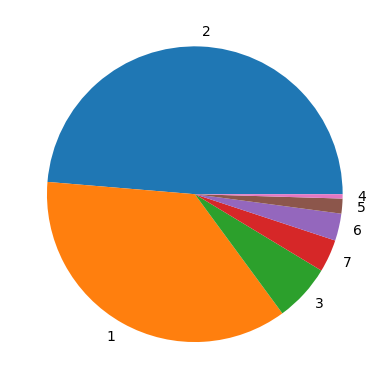

In [19]:
print(df['Cover_Type'].value_counts())

cover_counts = df['Cover_Type'].value_counts().reset_index()
plt.pie(cover_counts['count'], labels=cover_counts['Cover_Type'])
plt.show()

### Variables explicatives

In [20]:
#Dataframe avec toutes les valeurs du dataframe
df_long = pd.melt(df, var_name='Variables', value_name='Values')
df_long_rand = df_long[df_long['Variables'].isin(quantitative_vars)]

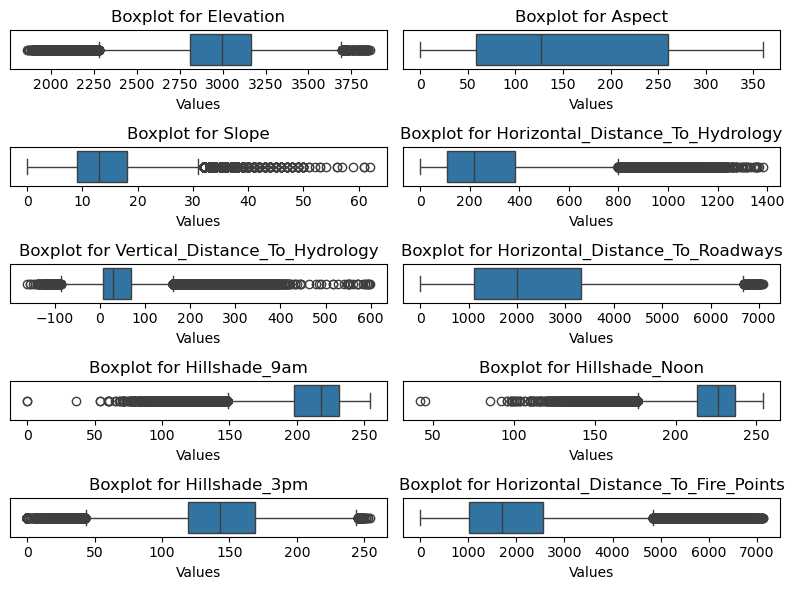

In [28]:
fig, axes = plt.subplots(5,2, figsize=(8,6))
axes = axes.flatten()

# Tracer un boxplot par variable avec sa propre échelle
for i, var in enumerate(quantitative_vars):
    sns.boxplot(data=df_long_rand[df_long_rand['Variables'] == var],x="Values", y="Variables", ax=axes[i],dodge=False)
    axes[i].set_title(f"Boxplot for {var}")
    axes[i].set_ylabel('')
    axes[i].get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

In [ ]:
# Filtre les données en fonction des quantiles calculés pour chaque variable
# Définition d'un nouveau dataframe df_filtered
df_filtered = df.copy()

for col in quantitative_vars:
    Q3 = df_filtered[col].quantile(0.85)
    Q1 = df_filtered[col].quantile(0.15)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]
df_filtered_long = pd.melt(df_filtered, var_name='Variables', value_name='Values')

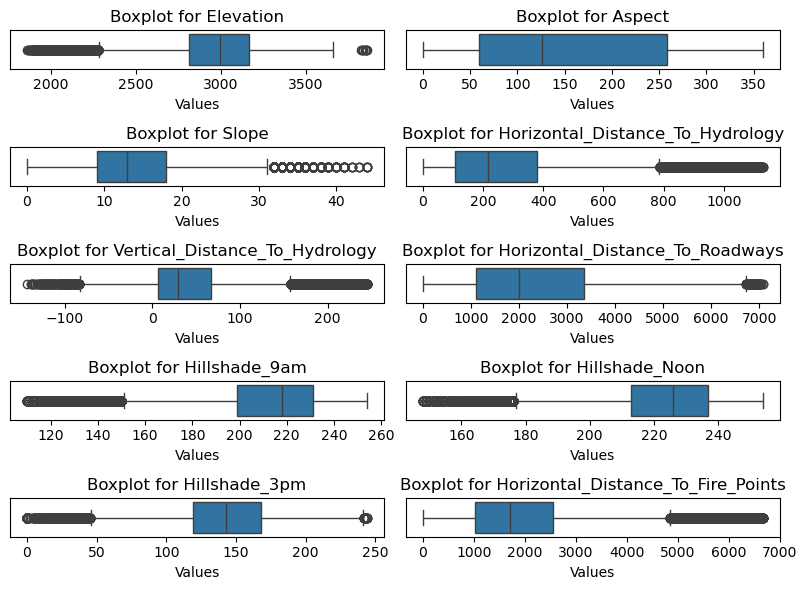

In [26]:
# Boxplot sur données filtrées
fig, axes = plt.subplots(5,2, figsize=(8, 6))
axes = axes.flatten()
# Tracer un boxplot par variable avec sa propre échelle
for i, var in enumerate(quantitative_vars):
    sns.boxplot(data=df_filtered_long[df_filtered_long['Variables'] == var],x="Values", y="Variables", ax=axes[i],dodge=False)
    axes[i].set_title(f"Boxplot for {var}")
    axes[i].set_ylabel('')
    axes[i].get_yaxis().set_visible(False)
    
plt.tight_layout()
plt.show()

## Corrélation

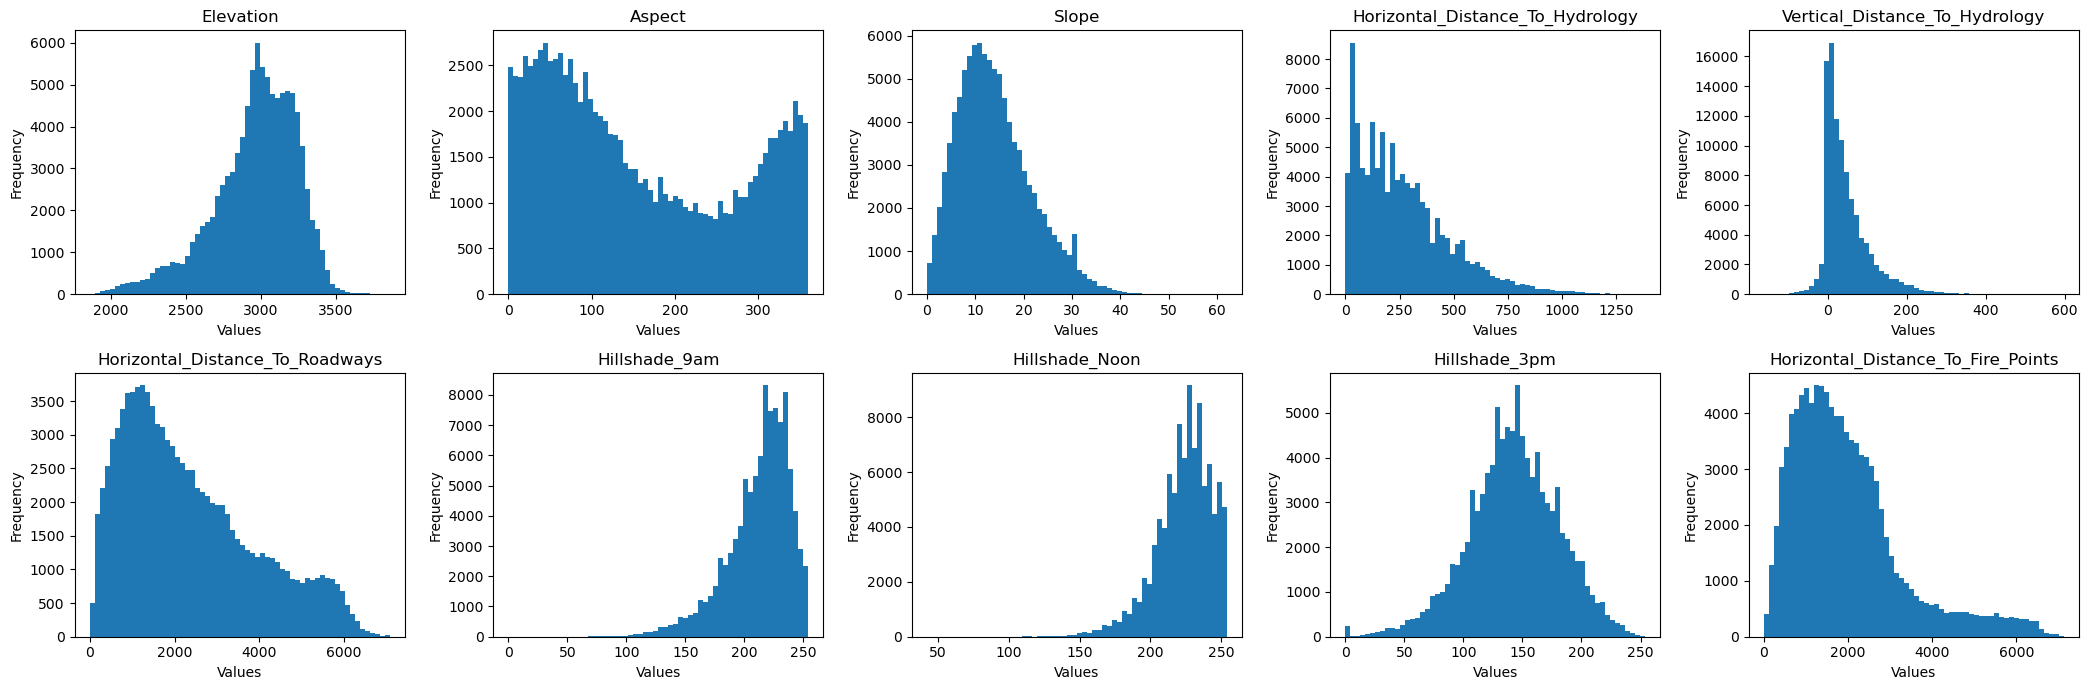

In [29]:
# Distribution des variables quantitatives
fig, axes = plt.subplots(2,5,figsize=(21,7))
axes = axes.flatten()
for i,col in enumerate(quantitative_vars):
  axes[i].hist(df[col],bins=60)
  axes[i].set_title(col)
  axes[i].set_xlabel('Values')
  axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

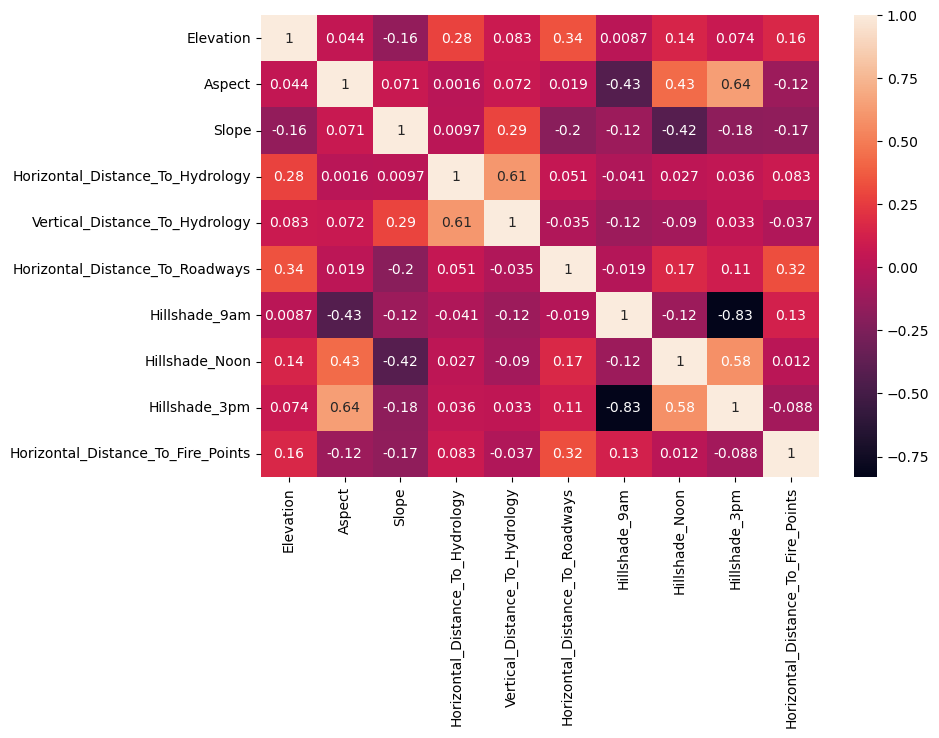

In [30]:
# Matrice de corrélation des variables quantitatives
df_corr = df_filtered[quantitative_vars].corr(method='spearman')
plt.figure(figsize=(9,6))
sns.heatmap(df_corr,annot=True)
plt.show()

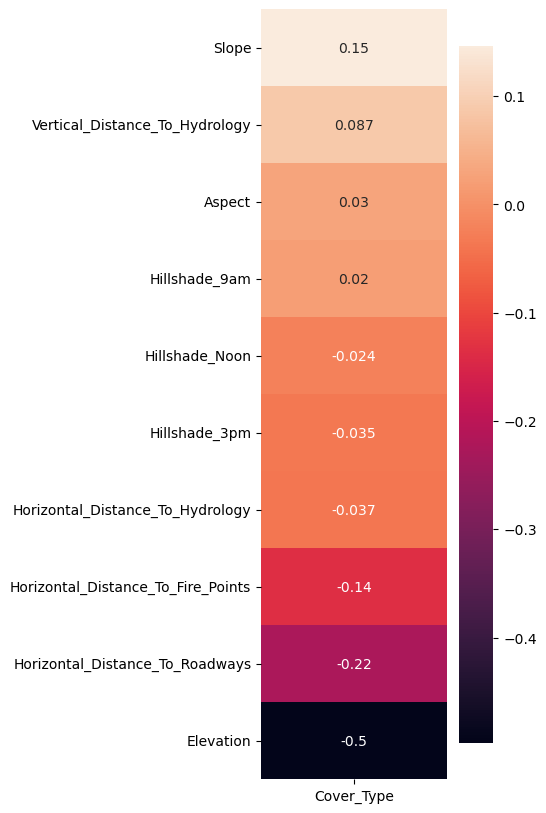

In [31]:
# Corrélation avec la vairable cible
df_corr2 = df_filtered[quantitative_vars+['Cover_Type']].corr(method='spearman')
target_spearman_corr = df_corr2[['Cover_Type']].drop('Cover_Type').sort_values(by='Cover_Type', ascending=False)
plt.figure(figsize=(3,10))
sns.heatmap(target_spearman_corr,annot=True)
plt.show()

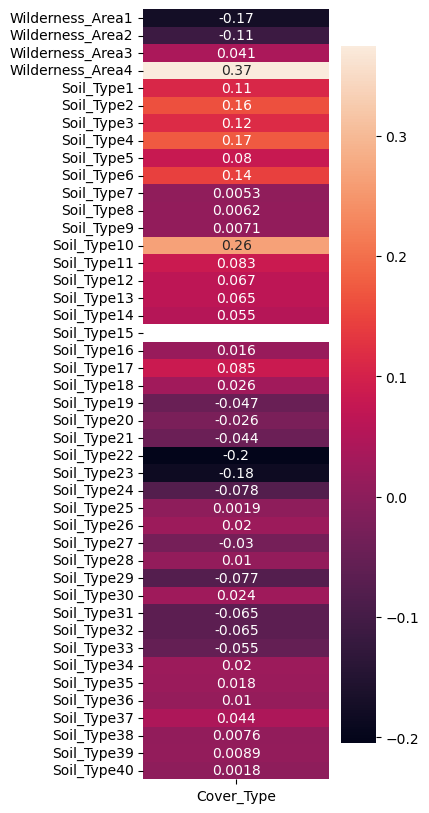

In [32]:
df_corr2 = df_filtered[qual_vars].corr(method='spearman')
target_spearman_corr = df_corr2[['Cover_Type']].drop('Cover_Type')
plt.figure(figsize=(3,10))
sns.heatmap(target_spearman_corr,annot=True)
plt.show()

###  Comparaison du taux Soil_Type et Wilderness_Area entre les données entraînement et test

In [33]:
nb_valeurs = np.zeros(len(qual_vars)-1)

for i, col in enumerate(qual_vars):
    if col != 'Cover_Type':
        nb_valeurs[i] = sum(df[col])

nb_valeurs2 = np.zeros(len(qual_vars)-1)

for i, col in enumerate(qual_vars):
    if col != 'Cover_Type':
        nb_valeurs2[i] = sum(test[col])

In [34]:
train_qual = pd.Series(nb_valeurs/df.shape[0], index=qualitative_vars, name="Test (%)")
test_qual = pd.Series(nb_valeurs2/test.shape[0], index=qualitative_vars, name="Test (%)")
comparaison_df = pd.concat([train_qual,test_qual], axis=1)

In [35]:
print(comparaison_df)

        Test (%)  Test (%)
Area1    0.44804  0.449037
Area2    0.05114  0.051496
Area3    0.43623  0.436041
Area4    0.06459  0.063427
Type1    0.00522  0.005216
Type2    0.01307  0.012927
Type3    0.00857  0.008245
Type4    0.02102  0.021401
Type5    0.00272  0.002755
Type6    0.01104  0.011374
Type7    0.00016  0.000185
Type8    0.00036  0.000297
Type9    0.00205  0.001958
Type10   0.05627  0.056146
Type11   0.02170  0.021288
Type12   0.05202  0.051494
Type13   0.03076  0.029843
Type14   0.00109  0.001019
Type15   0.00000  0.000006
Type16   0.00481  0.004915
Type17   0.00587  0.005894
Type18   0.00327  0.003268
Type19   0.00672  0.006962
Type20   0.01595  0.015933
Type21   0.00150  0.001430
Type22   0.05684  0.057564
Type23   0.09892  0.099499
Type24   0.03604  0.036743
Type25   0.00077  0.000825
Type26   0.00392  0.004567
Type27   0.00189  0.001865
Type28   0.00133  0.001690
Type29   0.19662  0.198716
Type30   0.05215  0.051880
Type31   0.04385  0.044242
Type32   0.09025  0.090422
T

## Importance des variables

In [37]:
# Exemple de colonnes one-hot encodées pour 'Soil_Type'
# Creation du dataframe decoded (varaibles qualitatives ne sont plus one hot encoded)
df_filtered2 = df_filtered.copy()
df_filtered2.columns
soil_columns = [col for col in df_filtered2.columns if col.startswith('Soil_Type')]
area_columns = [col for col in df_filtered2.columns if col.startswith('Wilderness_Area')]

df_filtered2['Soil_Type'] = np.argmax(df_filtered2[soil_columns].values, axis=1)
df_filtered2['Wilderness_Area'] = np.argmax(df_filtered2[area_columns].values, axis=1)

# Type catégorie pour pas confondre avec des entiers
df_filtered2['Soil_Type'] = df_filtered2['Soil_Type'].astype('category')
df_filtered2['Wilderness_Area'] = df_filtered2['Wilderness_Area'].astype('category')

# Supprimer les anciennes colonnes one-hot encodées
df_filtered2 = df_filtered2.drop(columns=soil_columns+area_columns)

Text(0.5, 0, 'Importance')

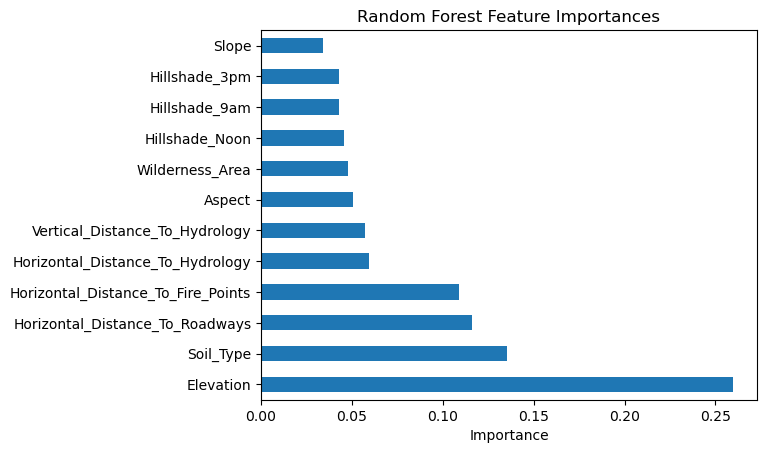

In [38]:
# Via randomForest
X = df_filtered2.drop('Cover_Type',axis=1)
y = df_filtered2['Cover_Type']

# Entrainer un modele de Random Forest
rfc_model = RandomForestClassifier()
rfc_model.fit(X, y)
imp = rfc_model.feature_importances_
forest_imp = pd.Series(imp, index = X.columns)
forest_imp = forest_imp.sort_values(ascending=False)

# Plot les importances
fig = plt.figure()

forest_imp.plot.barh()
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')